## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset using an outer join
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
merge_df.count()



Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Checking the number of unique mouse id
unique_mice = merge_df["Mouse ID"].nunique()
unique_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
subset_df = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
subset_df

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

g989 = merge_df.loc[merge_df["Mouse ID"] == "g989"]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropdup_df=merge_df.loc[merge_df["Mouse ID"].isin(subset_df)==False]
dropdup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
dropdup_df.count()
unique_mice_clean = dropdup_df["Mouse ID"].nunique()
unique_mice_clean

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# First creating a grouped df by drug regimen
grouped_df = dropdup_df.groupby(['Drug Regimen'])

# Mean
means = grouped_df.mean()["Tumor Volume (mm3)"]
means
# Another way without initially creating a grouped df is
# means = dropdup_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# Median
med = grouped_df.median()["Tumor Volume (mm3)"]
med

# Variance
variance = grouped_df.var()["Tumor Volume (mm3)"]
variance

# Standard Deviation
deviation = grouped_df.std()["Tumor Volume (mm3)"]
deviation

# Standard Error of the Mean (SEM)
std_error = grouped_df.sem()["Tumor Volume (mm3)"]
std_error

# Creating a summary statistics data frame
sum_stats = pd.DataFrame({"T.Vol-Mean": means, "T.Vol-Median": med, "T.Vol-Variance": variance, "T.Vol-Standard Deviation": deviation,
                         "T.Vol-SEM": std_error})
sum_stats

,T.Vol-Mean,T.Vol-Median,T.Vol-Variance,T.Vol-Standard Deviation,T.Vol-SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


sum_stat = pd.DataFrame({"T.Vol-Mean": grouped_df['Tumor Volume (mm3)'].mean(),
    "T.Vol-Median": grouped_df['Tumor Volume (mm3)'].median(),
    "T.Vol-Variance": grouped_df['Tumor Volume (mm3)'].var(),
    "T.Vol-STD": grouped_df['Tumor Volume (mm3)'].std(),
    "T.Vol-SEM": grouped_df['Tumor Volume (mm3)'].sem(),
})

sum_stat

,T.Vol-Mean,T.Vol-Median,T.Vol-Variance,T.Vol-STD,T.Vol-SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice')

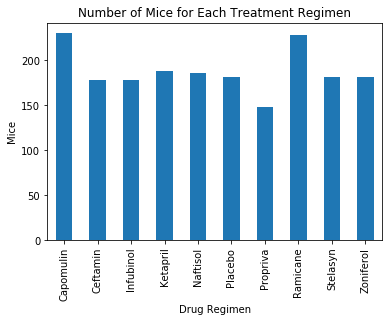

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Using the grouped data frame for counting the number of mice in each drug 
mice_grouped = grouped_df['Mouse ID'].count()

# Plotting using pandas
mice_grouped.plot(kind="bar")

# Adding labels
plt.title("Number of Mice for Each Treatment Regimen")
plt.ylabel("Mice")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

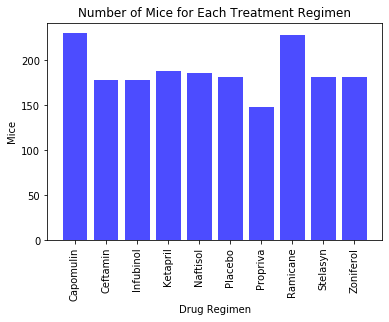

In [30]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Plotting using pyplot
# Create list that contains the drugs

#drugs = dropdup_df.groupby("Drug Regimen").apply(list)

drugs = mice_grouped.index.to_list()
drugs

plt.bar(drugs, mice_grouped, color='b', alpha=0.7, align="center")

# Adding labels
plt.title("Number of Mice for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.xticks(rotation='vertical')

Text(0, 0.5, 'Distribution of Females Vs Males')

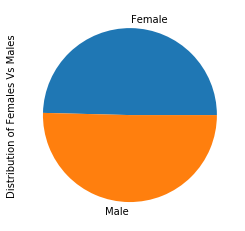

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Grouping the males and females 
mice_gender = dropdup_df.groupby(['Sex'])

# Getting unique female and male mice
gender_unique = mice_gender['Mouse ID'].unique()
gender_unique

# Getting the count of unique female and male mice
gender_count = gender_unique.map(len)
gender_count

gender_count.plot.pie(y='Sex')
plt.ylabel('Distribution of Females Vs Males')




Text(0, 0.5, 'Distribution of Females Vs Males')

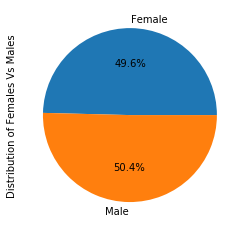

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
#colors = ["pink", "blue"]

plt.pie(gender_count, labels= labels, autopct="%1.1f%%")

plt.ylabel('Distribution of Females Vs Males')



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
